## Clustering for dataset exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

points = pd.read_csv("seeds.csv",header=None)
samples = points.iloc[:,0:7]

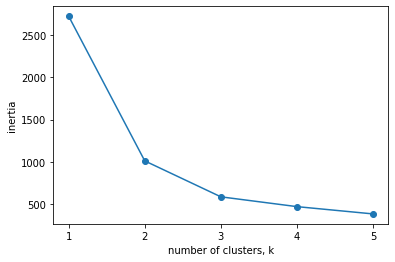

In [2]:
# We will use the k-means inertia graph to find the number of clusters
# We are given an array samples containing the measurements (such as area,
#perimeter, length, and several others) of samples of grain. 

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


Evaluating the grain clustering

From the inertia plot we can see that 3 is a good number of clusters for the grain data.

In [3]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)



### Scaling fish data for clustering

You are given an array samples giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, We'll need to standardize these features first. In this exercise, We'll build a pipeline to standardize and cluster the data.

In [4]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)

fish = pd.read_csv("fish.csv",header=None)
samples = fish.iloc[:,1:].values
species = fish.iloc[:,0]



In [5]:


# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])


# Display ct
print(ct)


species  Bream  Pike  Roach  Smelt
labels                            
0            0    17      0      0
1            1     0     19      1
2           33     0      1      0
3            0     0      0     13


### Normalizing stock data

We'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). Some stocks are more expensive than others. To account for this, we will include a Normalizer at the beginning of the pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Normalizer() is different to StandardScaler(). While StandardScaler() standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.


In [6]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

#import data
stock = pd.read_csv("company-stock-movements-2010-2015-incl.csv",header=0)
movements = stock.iloc[:,1:].values
companies = stock.iloc[:,0]

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)


Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=10, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

## # Which stocks move together?

We already clustered companies by their daily stock price movements. So which company have stock prices that tend to change in the same way? We'll now inspect the cluster labels from your clustering to find out.



In [7]:

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values(by='labels'))


    labels                           companies
53       0                       Valero Energy
23       0                                 IBM
57       0                               Exxon
44       0                        Schlumberger
16       0                   General Electrics
42       0                   Royal Dutch Shell
39       0                              Pfizer
49       0                               Total
8        0                         Caterpillar
10       0                      ConocoPhillips
32       0                                  3M
12       0                             Chevron
13       0                   DuPont de Nemours
58       1                               Xerox
34       1                          Mitsubishi
35       1                            Navistar
43       1                                 SAP
45       1                                Sony
22       1                                  HP
21       1                               Honda
48       1   